### Deliverable 1: Preprocessing the Data for a Neural Network

In [39]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [40]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [41]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN","NAME"],1)

In [42]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [43]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

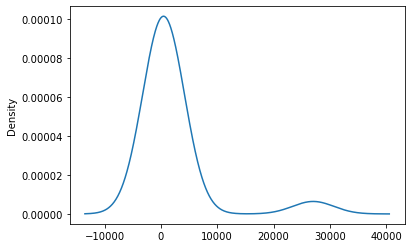

In [44]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [45]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_counts[application_counts < 500].index)




In [46]:
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    

In [47]:
# Look at CLASSIFICATION value counts for binning
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [48]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C1732        1
C6100        1
C1820        1
C2570        1
C1728        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

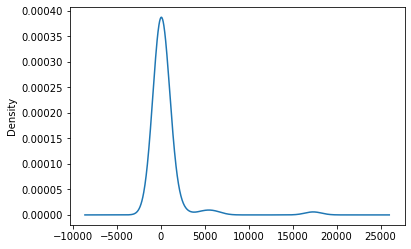

In [49]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [50]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [51]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [52]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values




In [55]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [56]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [57]:
X_train_scaled.shape

(25724, 43)

### Deliverable 2: Compile, Train and Evaluate the Model

In [58]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3520      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [59]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [60]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [61]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=1000)

In [62]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=800, callbacks=[cp_callback])

Epoch 1/800
804/804 [==============================] - 3s 1ms/step - loss: 0.5722 - accuracy: 0.7216
Epoch 2/800
192/804 [======>.......................] - ETA: 0s - loss: 0.5546 - accuracy: 0.7323
Epoch 00002: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5562 - accuracy: 0.7285
Epoch 3/800
368/804 [============>.................] - ETA: 0s - loss: 0.5555 - accuracy: 0.7255
Epoch 00003: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5536 - accuracy: 0.7272
Epoch 4/800
555/804 [===================>..........] - ETA: 0s - loss: 0.5533 - accuracy: 0.7296
Epoch 00004: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5525 - accuracy: 0.7284
Epoch 5/800
764/804 [===========================>..] - ETA: 0s - loss: 0.5495 - accuracy: 0.7328
Epoch 00005: saving model to checkpoints\weights.05.hdf5
804/804 [=======

447/804 [===============>..............] - ETA: 0s - loss: 0.5401 - accuracy: 0.7365
Epoch 00039: saving model to checkpoints\weights.39.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5401 - accuracy: 0.7359
Epoch 40/800
611/804 [=====================>........] - ETA: 0s - loss: 0.5396 - accuracy: 0.7371 ETA: 0s - loss: 0
Epoch 00040: saving model to checkpoints\weights.40.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5398 - accuracy: 0.7362
Epoch 41/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5402 - accuracy: 0.7367
Epoch 42/800
  1/804 [..............................] - ETA: 1s - loss: 0.6506 - accuracy: 0.7500
Epoch 00042: saving model to checkpoints\weights.42.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5398 - accuracy: 0.7369
Epoch 43/800
227/804 [=======>......................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7398
Epoch 00043: saving model to checkpoints\weights.43.hdf5
804/80

804/804 [==============================] - 1s 1ms/step - loss: 0.5367 - accuracy: 0.7386
Epoch 77/800
804/804 [==============================] - 1s 2ms/step - loss: 0.5366 - accuracy: 0.7379
Epoch 78/800
 79/804 [=>............................] - ETA: 0s - loss: 0.5386 - accuracy: 0.7409
Epoch 00078: saving model to checkpoints\weights.78.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5366 - accuracy: 0.7379
Epoch 79/800
267/804 [========>.....................] - ETA: 0s - loss: 0.5376 - accuracy: 0.7375
Epoch 00079: saving model to checkpoints\weights.79.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5361 - accuracy: 0.7390: 0s - loss: 0.5356 - accura
Epoch 80/800
468/804 [================>.............] - ETA: 0s - loss: 0.5340 - accuracy: 0.7390
Epoch 00080: saving model to checkpoints\weights.80.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5366 - accuracy: 0.7385
Epoch 81/800
653/804 [=======================>...

804/804 [==============================] - 1s 1ms/step - loss: 0.5352 - accuracy: 0.7393
Epoch 115/800
325/804 [===========>..................] - ETA: 0s - loss: 0.5386 - accuracy: 0.7367
Epoch 00115: saving model to checkpoints\weights.115.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7401
Epoch 116/800
514/804 [==================>...........] - ETA: 0s - loss: 0.5336 - accuracy: 0.7403
Epoch 00116: saving model to checkpoints\weights.116.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5350 - accuracy: 0.7390
Epoch 117/800
717/804 [=========================>....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7385
Epoch 00117: saving model to checkpoints\weights.117.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7392
Epoch 118/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7389
Epoch 119/800
 97/804 [==>...........................] - ETA: 0s - los

804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7394
Epoch 152/800
583/804 [====================>.........] - ETA: 0s - loss: 0.5350 - accuracy: 0.7391
Epoch 00152: saving model to checkpoints\weights.152.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 0.7395
Epoch 153/800
761/804 [===========================>..] - ETA: 0s - loss: 0.5338 - accuracy: 0.7395
Epoch 00153: saving model to checkpoints\weights.153.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7399
Epoch 154/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7395
Epoch 155/800
142/804 [====>.........................] - ETA: 0s - loss: 0.5383 - accuracy: 0.7344
Epoch 00155: saving model to checkpoints\weights.155.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7401
Epoch 156/800
357/804 [============>.................] - ETA: 0s - los

804/804 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7400
Epoch 189/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5335 - accuracy: 0.7397
Epoch 190/800
 32/804 [>.............................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7383
Epoch 00190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5345 - accuracy: 0.7398
Epoch 191/800
227/804 [=======>......................] - ETA: 0s - loss: 0.5376 - accuracy: 0.7398
Epoch 00191: saving model to checkpoints\weights.191.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5334 - accuracy: 0.7393
Epoch 192/800
404/804 [==============>...............] - ETA: 0s - loss: 0.5288 - accuracy: 0.7428
Epoch 00192: saving model to checkpoints\weights.192.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7400
Epoch 193/800
607/804 [=====================>........] - ETA: 0s - los

804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7395
Epoch 227/800
264/804 [========>.....................] - ETA: 0s - loss: 0.5322 - accuracy: 0.7398
Epoch 00227: saving model to checkpoints\weights.227.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5327 - accuracy: 0.7401
Epoch 228/800
449/804 [===============>..............] - ETA: 0s - loss: 0.5318 - accuracy: 0.7401
Epoch 00228: saving model to checkpoints\weights.228.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5328 - accuracy: 0.7402
Epoch 229/800
658/804 [=======================>......] - ETA: 0s - loss: 0.5312 - accuracy: 0.7430
Epoch 00229: saving model to checkpoints\weights.229.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5325 - accuracy: 0.7411
Epoch 230/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.7397
Epoch 231/800
 50/804 [>.............................] - ETA: 0s - los

804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7397
Epoch 264/800
534/804 [==================>...........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7408
Epoch 00264: saving model to checkpoints\weights.264.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5325 - accuracy: 0.7402
Epoch 265/800
722/804 [=========================>....] - ETA: 0s - loss: 0.5310 - accuracy: 0.7415
Epoch 00265: saving model to checkpoints\weights.265.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7406
Epoch 266/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7405
Epoch 267/800
 95/804 [==>...........................] - ETA: 0s - loss: 0.5100 - accuracy: 0.7470
Epoch 00267: saving model to checkpoints\weights.267.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5320 - accuracy: 0.7396
Epoch 268/800
289/804 [=========>....................] - ETA: 0s - los

804/804 [==============================] - 1s 1ms/step - loss: 0.5322 - accuracy: 0.7404
Epoch 301/800
786/804 [============================>.] - ETA: 0s - loss: 0.5324 - accuracy: 0.7401
Epoch 00301: saving model to checkpoints\weights.301.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7402
Epoch 302/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7408
Epoch 303/800
162/804 [=====>........................] - ETA: 1s - loss: 0.5268 - accuracy: 0.7458
Epoch 00303: saving model to checkpoints\weights.303.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5318 - accuracy: 0.7404
Epoch 304/800
356/804 [============>.................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7439
Epoch 00304: saving model to checkpoints\weights.304.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7410
Epoch 305/800
545/804 [===================>..........] - ETA: 0s - los

804/804 [==============================] - 1s 1ms/step - loss: 0.5311 - accuracy: 0.7405
Epoch 339/800
246/804 [========>.....................] - ETA: 0s - loss: 0.5242 - accuracy: 0.7461
Epoch 00339: saving model to checkpoints\weights.339.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7402
Epoch 340/800
415/804 [==============>...............] - ETA: 0s - loss: 0.5308 - accuracy: 0.7433
Epoch 00340: saving model to checkpoints\weights.340.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7416
Epoch 341/800
632/804 [======================>.......] - ETA: 0s - loss: 0.5349 - accuracy: 0.7390
Epoch 00341: saving model to checkpoints\weights.341.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5326 - accuracy: 0.7407
Epoch 342/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.7404
Epoch 343/800
  1/804 [..............................] - ETA: 2s - los

804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7406
Epoch 376/800
476/804 [================>.............] - ETA: 0s - loss: 0.5283 - accuracy: 0.7435
Epoch 00376: saving model to checkpoints\weights.376.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.7403
Epoch 377/800
686/804 [========================>.....] - ETA: 0s - loss: 0.5292 - accuracy: 0.7427
Epoch 00377: saving model to checkpoints\weights.377.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7399
Epoch 378/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.7402
Epoch 379/800
 65/804 [=>............................] - ETA: 1s - loss: 0.5389 - accuracy: 0.7317
Epoch 00379: saving model to checkpoints\weights.379.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.7405
Epoch 380/800
272/804 [=========>....................] - ETA: 0s - los

750/804 [==========================>...] - ETA: 0s - loss: 0.5303 - accuracy: 0.7412
Epoch 00413: saving model to checkpoints\weights.413.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7408
Epoch 414/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5323 - accuracy: 0.7416
Epoch 415/800
133/804 [===>..........................] - ETA: 0s - loss: 0.5312 - accuracy: 0.7401
Epoch 00415: saving model to checkpoints\weights.415.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7406
Epoch 416/800
316/804 [==========>...................] - ETA: 0s - loss: 0.5361 - accuracy: 0.7340
Epoch 00416: saving model to checkpoints\weights.416.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5309 - accuracy: 0.7402
Epoch 417/800
525/804 [==================>...........] - ETA: 0s - loss: 0.5337 - accuracy: 0.7396
Epoch 00417: saving model to checkpoints\weights.417.hdf5
804/804 [=======

175/804 [=====>........................] - ETA: 0s - loss: 0.5212 - accuracy: 0.7479
Epoch 00451: saving model to checkpoints\weights.451.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7404
Epoch 452/800
390/804 [=============>................] - ETA: 0s - loss: 0.5329 - accuracy: 0.7380
Epoch 00452: saving model to checkpoints\weights.452.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.7407
Epoch 453/800
586/804 [====================>.........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7394
Epoch 00453: saving model to checkpoints\weights.453.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7411
Epoch 454/800
771/804 [===========================>..] - ETA: 0s - loss: 0.5304 - accuracy: 0.7406
Epoch 00454: saving model to checkpoints\weights.454.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7408
Epoch 455/800
804/804 [=======

804/804 [==============================] - 1s 1ms/step - loss: 0.5318 - accuracy: 0.7409: 0s - loss: 0.5323 - accu
Epoch 488/800
422/804 [==============>...............] - ETA: 0s - loss: 0.5312 - accuracy: 0.7403
Epoch 00488: saving model to checkpoints\weights.488.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7400
Epoch 489/800
603/804 [=====================>........] - ETA: 0s - loss: 0.5301 - accuracy: 0.7413
Epoch 00489: saving model to checkpoints\weights.489.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5300 - accuracy: 0.7417
Epoch 490/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7407
Epoch 491/800
  1/804 [..............................] - ETA: 0s - loss: 0.4856 - accuracy: 0.7500
Epoch 00491: saving model to checkpoints\weights.491.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7407
Epoch 492/800
227/804 [=======>.............

804/804 [==============================] - 1s 1ms/step - loss: 0.5358 - accuracy: 0.7408
Epoch 525/800
688/804 [========================>.....] - ETA: 0s - loss: 0.5314 - accuracy: 0.7405
Epoch 00525: saving model to checkpoints\weights.525.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5307 - accuracy: 0.7411
Epoch 526/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5299 - accuracy: 0.7413
Epoch 527/800
 55/804 [=>............................] - ETA: 0s - loss: 0.5284 - accuracy: 0.7392
Epoch 00527: saving model to checkpoints\weights.527.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5300 - accuracy: 0.7398
Epoch 528/800
278/804 [=========>....................] - ETA: 0s - loss: 0.5289 - accuracy: 0.7415
Epoch 00528: saving model to checkpoints\weights.528.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5312 - accuracy: 0.7412
Epoch 529/800
461/804 [================>.............] - ETA: 0s - los

804/804 [==============================] - 1s 1ms/step - loss: 0.5302 - accuracy: 0.7415
Epoch 563/800
136/804 [====>.........................] - ETA: 0s - loss: 0.5376 - accuracy: 0.7371
Epoch 00563: saving model to checkpoints\weights.563.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5300 - accuracy: 0.7405
Epoch 564/800
328/804 [===========>..................] - ETA: 0s - loss: 0.5242 - accuracy: 0.7469
Epoch 00564: saving model to checkpoints\weights.564.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5302 - accuracy: 0.7411
Epoch 565/800
502/804 [=================>............] - ETA: 0s - loss: 0.5301 - accuracy: 0.7411
Epoch 00565: saving model to checkpoints\weights.565.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5301 - accuracy: 0.7417
Epoch 566/800
730/804 [==========================>...] - ETA: 0s - loss: 0.5315 - accuracy: 0.7409
Epoch 00566: saving model to checkpoints\weights.566.hdf5
804/804 [=======

804/804 [==============================] - 1s 1ms/step - loss: 0.5311 - accuracy: 0.7414
Epoch 600/800
359/804 [============>.................] - ETA: 0s - loss: 0.5347 - accuracy: 0.7382
Epoch 00600: saving model to checkpoints\weights.600.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7410
Epoch 601/800
579/804 [====================>.........] - ETA: 0s - loss: 0.5280 - accuracy: 0.7430
Epoch 00601: saving model to checkpoints\weights.601.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7411
Epoch 602/800
762/804 [===========================>..] - ETA: 0s - loss: 0.5311 - accuracy: 0.7402
Epoch 00602: saving model to checkpoints\weights.602.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5300 - accuracy: 0.7415
Epoch 603/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5297 - accuracy: 0.7411
Epoch 604/800
184/804 [=====>........................] - ETA: 0s - los

804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7416
Epoch 637/800
645/804 [=======================>......] - ETA: 0s - loss: 0.5299 - accuracy: 0.7406
Epoch 00637: saving model to checkpoints\weights.637.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5298 - accuracy: 0.7412
Epoch 638/800
804/804 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.7411
Epoch 639/800
 39/804 [>.............................] - ETA: 1s - loss: 0.5225 - accuracy: 0.7492
Epoch 00639: saving model to checkpoints\weights.639.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5298 - accuracy: 0.7415
Epoch 640/800
226/804 [=======>......................] - ETA: 0s - loss: 0.5302 - accuracy: 0.7476
Epoch 00640: saving model to checkpoints\weights.640.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5296 - accuracy: 0.7414
Epoch 641/800
423/804 [==============>...............] - ETA: 0s - los

804/804 [==============================] - 1s 1ms/step - loss: 0.5318 - accuracy: 0.7414
Epoch 675/800
 90/804 [==>...........................] - ETA: 0s - loss: 0.5350 - accuracy: 0.7382
Epoch 00675: saving model to checkpoints\weights.675.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5318 - accuracy: 0.7426
Epoch 676/800
268/804 [=========>....................] - ETA: 0s - loss: 0.5197 - accuracy: 0.7464
Epoch 00676: saving model to checkpoints\weights.676.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7415
Epoch 677/800
456/804 [================>.............] - ETA: 0s - loss: 0.5300 - accuracy: 0.7410
Epoch 00677: saving model to checkpoints\weights.677.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5308 - accuracy: 0.7418
Epoch 678/800
681/804 [========================>.....] - ETA: 0s - loss: 0.5309 - accuracy: 0.7409
Epoch 00678: saving model to checkpoints\weights.678.hdf5
804/804 [=======

340/804 [===========>..................] - ETA: 0s - loss: 0.5345 - accuracy: 0.7392
Epoch 00712: saving model to checkpoints\weights.712.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5293 - accuracy: 0.7423
Epoch 713/800
531/804 [==================>...........] - ETA: 0s - loss: 0.5336 - accuracy: 0.7391
Epoch 00713: saving model to checkpoints\weights.713.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5292 - accuracy: 0.7414
Epoch 714/800
708/804 [=========================>....] - ETA: 0s - loss: 0.5306 - accuracy: 0.7400
Epoch 00714: saving model to checkpoints\weights.714.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7413
Epoch 715/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5302 - accuracy: 0.7418
Epoch 716/800
121/804 [===>..........................] - ETA: 0s - loss: 0.5205 - accuracy: 0.7448
Epoch 00716: saving model to checkpoints\weights.716.hdf5
804/804 [=======

804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7416
Epoch 750/800
785/804 [============================>.] - ETA: 0s - loss: 0.5293 - accuracy: 0.7422
Epoch 00750: saving model to checkpoints\weights.750.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5295 - accuracy: 0.7420
Epoch 751/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7415
Epoch 752/800
184/804 [=====>........................] - ETA: 0s - loss: 0.5164 - accuracy: 0.7544
Epoch 00752: saving model to checkpoints\weights.752.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5297 - accuracy: 0.7423
Epoch 753/800
370/804 [============>.................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7388
Epoch 00753: saving model to checkpoints\weights.753.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5284 - accuracy: 0.7422
Epoch 754/800
563/804 [====================>.........] - ETA: 0s - los

804/804 [==============================] - 1s 1ms/step - loss: 0.5290 - accuracy: 0.7416
Epoch 788/800
241/804 [=======>......................] - ETA: 0s - loss: 0.5226 - accuracy: 0.7492
Epoch 00788: saving model to checkpoints\weights.788.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5289 - accuracy: 0.7421
Epoch 789/800
427/804 [==============>...............] - ETA: 0s - loss: 0.5261 - accuracy: 0.7458
Epoch 00789: saving model to checkpoints\weights.789.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7420
Epoch 790/800
640/804 [======================>.......] - ETA: 0s - loss: 0.5281 - accuracy: 0.7430
Epoch 00790: saving model to checkpoints\weights.790.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5294 - accuracy: 0.7409
Epoch 791/800
804/804 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7418
Epoch 792/800
  1/804 [..............................] - ETA: 1s - los

In [63]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6388 - accuracy: 0.7285 - 530ms/epoch - 2ms/step
Loss: 0.6387597322463989, Accuracy: 0.7285131216049194


In [64]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")